In [2]:
import os
parentdir = os.getcwd()
print(parentdir)
directory=r"D:\Research\Experimental\Analysis\2017analysis\201702\Analysis_Sebby_March_2017\S104d21Feb17_60.5_635_A2_CuAzu655";#data directory
os.chdir(directory)

D:\Research\Reports and Presentation\reports\azurin_single-molecule\Analysis


In [3]:
#Import modules
import os.path
import glob
import os
import re
from xlwt import Workbook

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from numpy import sqrt, pi, exp, linspace, loadtxt

from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
os.chdir(parentdir)
!python analysis_version_6.py
%run analysis_version_6.py

Fit ON time histogram: 379.187527319 * e^{-46.0139187267 t}
Fit OFF time histogram: -738.581196778 * e^{-123.932824013 t} - -645.880564022 * e^{-47.1064204505 t}


()

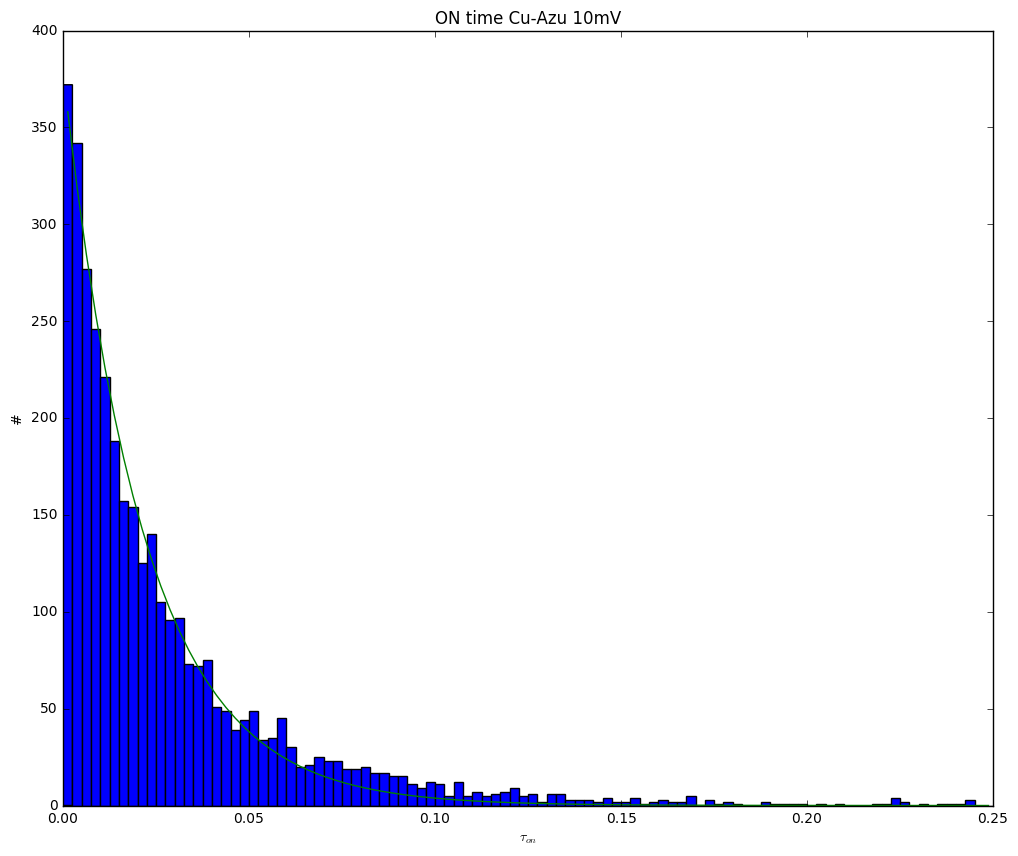

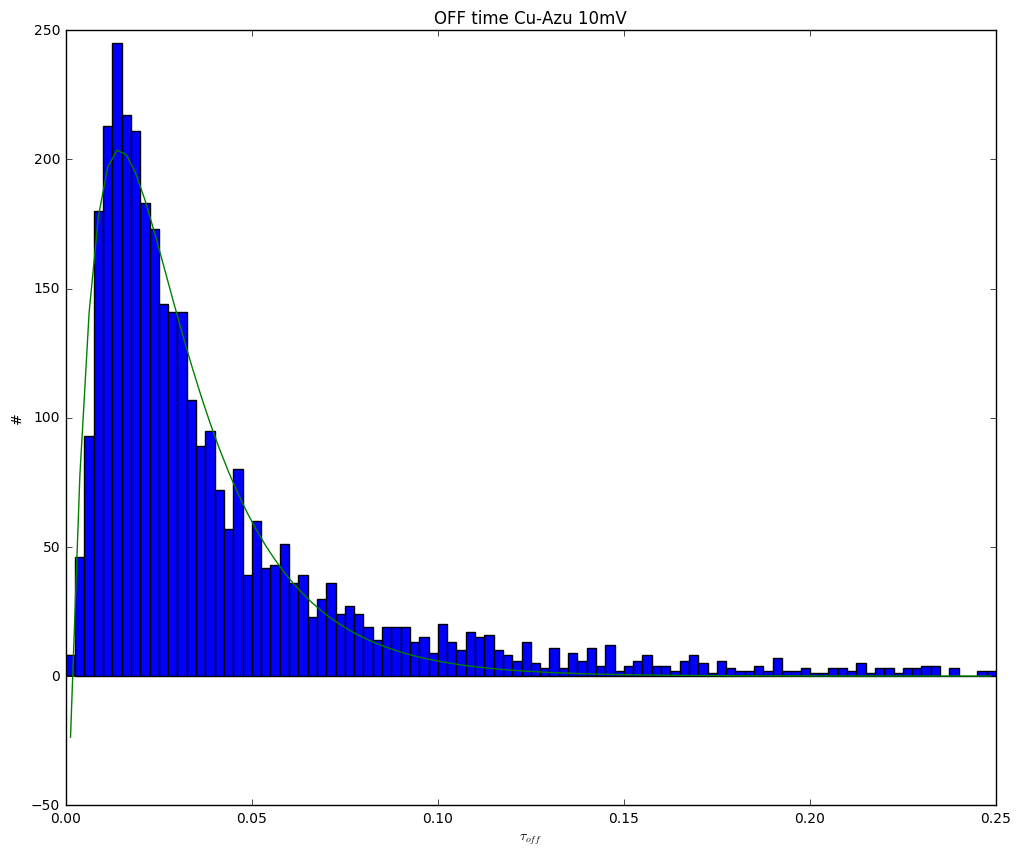

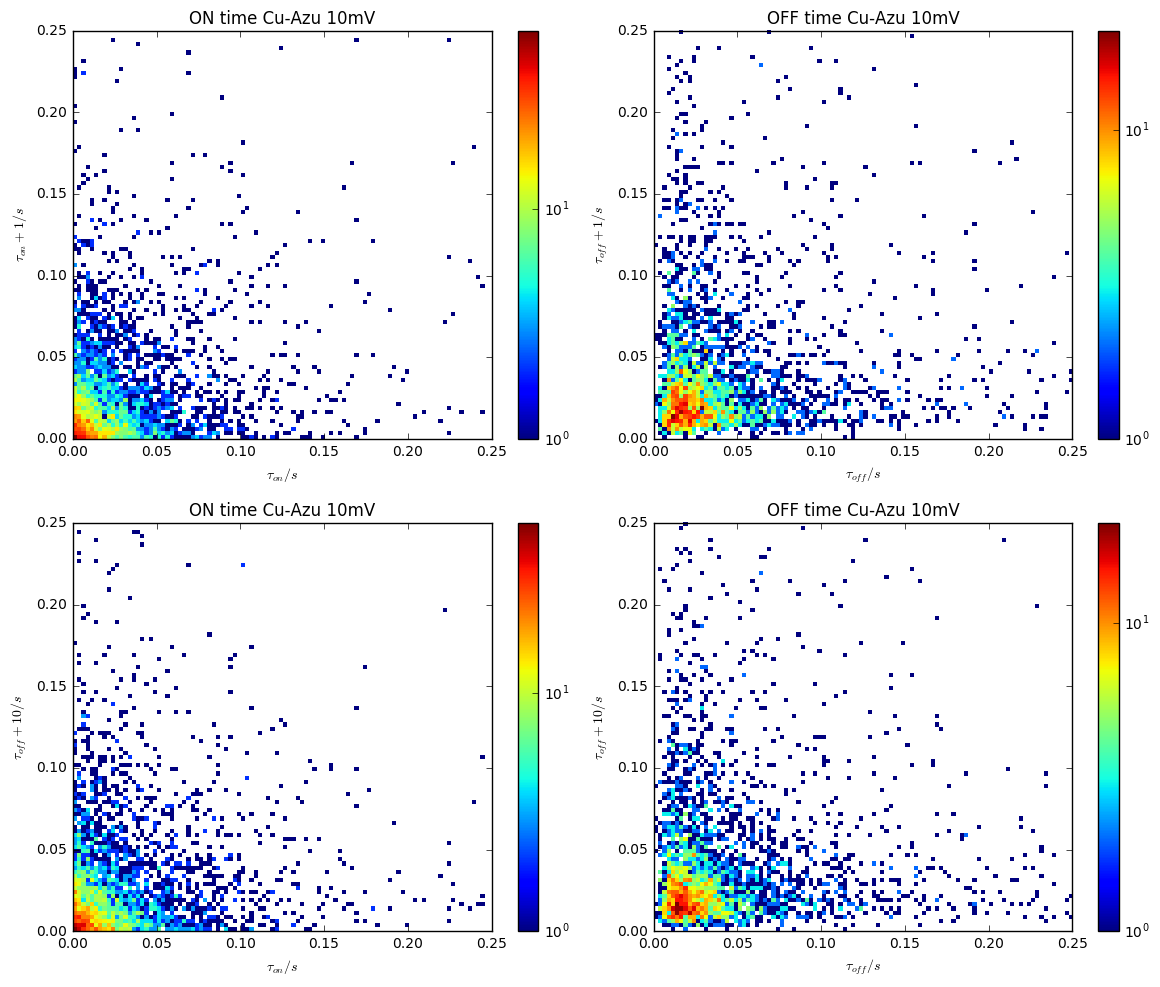

In [9]:
#*************Analysis for a specific potential********************

titel = 'average_on_and_off_time_specific_mV_Cu.xls' #name excell output file
pointnumbers = 31 #Change this to the minimal amount of points
pot = 18 #number of potentials
specific_potential = 10 #the specific potential you want the plots for
onMax=0.25;offMax=0.25;
rnge_on = [[0,onMax], [0,onMax]] #range on histograms, form: [[0,0.25], [0,0.25]] --> [xrange], [yrange]
rnge_off = [[0,offMax], [0,offMax]] #range off histograms
bins_on = 100  #bins for the on histograms
bins_off = 100 #bins for the off histograms
proteins = 'Cu' #change this to 'Zn' or 'Cu' depending on which files you are analysing. Changes title of plots.
current_dir = directory#'S101d14Feb17_60.5_635_A2_CuAzu655' #foldername you want to work in.
max_his_on = onMax
max_his_off = offMax
x_shift = 10 # t vs  t + x_shift 

histograms(titel, pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off, proteins, current_dir, max_his_on, max_his_off, x_shift)

In [4]:
os.chdir(parentdir)
!python analysis_version_9.py
%run analysis_version_9.py

In [61]:
# #************* on and off times********************
# os.chdir(directory)
# titel = 'average_on_and_off_time_specific_mV_Cu.xls' #name excell output file
# pointnumbers = 31 #Change this to the minimal amount of points
# pot = 16 #number of potentials
# proteins = 'Cu' #change this to 'Zn' or 'Cu' depending on which files you are analysing. Changes title of plots.
# current_dir = directory #foldername you want to work in.
# average_on_and_off_times(titel, pot, pointnumbers, proteins, current_dir)

C:\Users\Pradhan\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\Pradhan\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


Total length of the time trace is 30.0


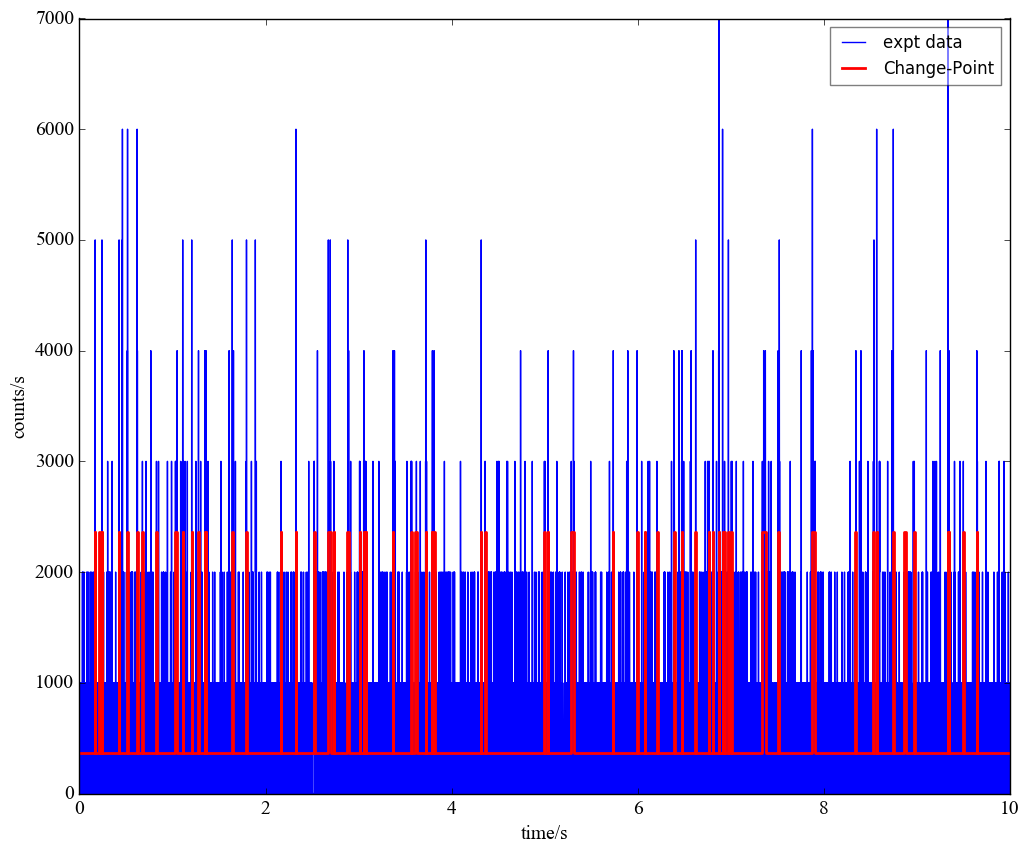

In [9]:
#************* data and changepoint plot********************
os.chdir(directory);os.chdir("Point_A2_60.5__30s_2nd_9/data/")
file1 = 'Point_A2_100mV(15)_60.5__30s_9.pt3.datn'
file2 = 'Point_A2_100mV(15)_60.5__30s_9.pt3.datn.em.plot'
x_lim_min = 0
x_lim_max = 2
y_lim_min = 0
y_lim_max = 10000

time_trace_plot(file1, file2)
savefig('timetrace.svg', dpi=500, transparent=True)

In [1]:
os.chdir(directory);os.chdir("Point_A2_60.5__30s_2nd_6/data/")
file1 = 'Point_A2_100mV(15)_60.5__30s_6.pt3.datn'
file2 = 'Point_A2_100mV(15)_60.5__30s_6.pt3.datn.em.plot'
x_lim_min = 0
x_lim_max = 10
y_lim_min = 0
y_lim_max = 10000

time_trace_plot(file1, file2, x_lim_min, x_lim_max, y_lim_min, y_lim_max)

NameError: name 'os' is not defined

()

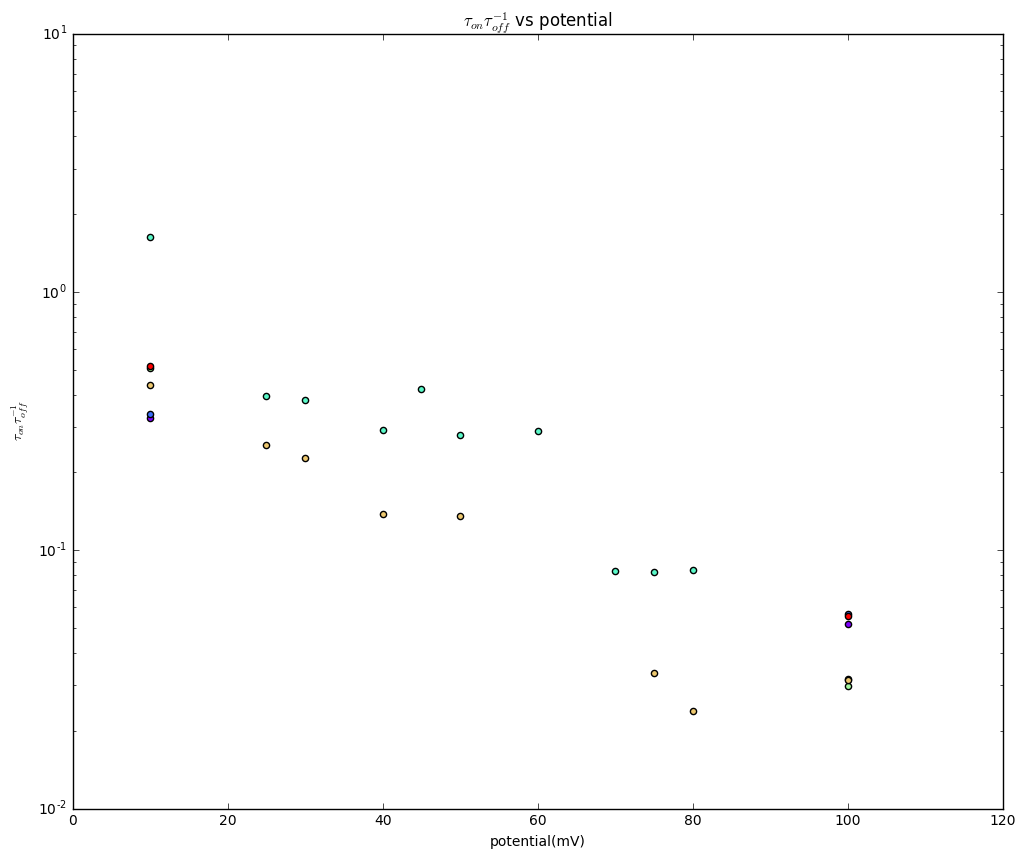

In [27]:
#************* t_on t_off^(-1) vs potential********************

pointnumbers = 31 #Change this to the minimal amount of points
pot = 11 #number of potentials
current_dir = directory #foldername you want to work in.
protein_amount = 8 #number of proteins you want to be plotted (will plot the first x proteins)
t_ratio(pot, pointnumbers, current_dir, protein_amount)